<a href="https://colab.research.google.com/github/SofiNurul/sofinurul.github.io/blob/main/Analisis_Sentiment_Algoritma_Naive_Bayes_dengan_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.ensemble import AdaBoostClassifier

Mengunduh resource nltk yang diperlukan

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Muat dataset

In [ ]:
df = pd.read_csv('Datalatih_sentiment_shopee.csv', encoding='MacRoman')

Daftar stopwords dari NLTK dan tambahan khusus Bahasa Indonesia

In [ ]:
stopwords_tambahan = set([
    'gk', 'yg', 'nya', 'dan', 'dll', 'saja', 'juga', 'untuk', 'dengan', 'atau',
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
    'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal',
    'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan',
    'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
    'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
    'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja',
    'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir',
    'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal',
    'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali',
    'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung',
    'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
    'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur',
    'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa',
    'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya',
    'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam',
    'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan',
    'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi',
    'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan',
    'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan',
    'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui',
    'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan',
    'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah',
    'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan',
    'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
    'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini',
    'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan',
    'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan',
    'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak',
    'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari',
    'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat',
    'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini',
    'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan',
    'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya',
    'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun',
    'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena',
    'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan',
    'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar',
    'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian',
    'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira',
    'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya',
    'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka',
    'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa',
    'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan',
    'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan',
    'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan',
    'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai',
    'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti',
    'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi',
    'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai',
    'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat',
    'mengingatkan'
])

Inisialisasi Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

Fungsi untuk membersihkan teks

In [ ]:
def bersihkan_teks_dengan_lemmat(teks):
    teks = teks.lower()
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)
    teks = teks.translate(str.maketrans('', '', string.punctuation))
    teks = re.sub(r'\d+', '', teks)
    kata_kata = teks.split()
    teks_bersih = ' '.join([lemmatizer.lemmatize(kata) for kata in kata_kata if kata not in stopwords_tambahan])
    return teks_bersih

Terapkan fungsi pembersihan pada kolom 'content'

In [ ]:
df['cleaned_content'] = df['content'].apply(bersihkan_teks)

Kamus subjektivitas dengan kategori intensitas dan polaritas emosional

In [ ]:
# Definisikan daftar kata-kata positif dan negatif yang digabungkan
positif = [
    'pembebasan', 'penghargaan', 'altruistik', 'luar biasa', 'hebat', 'inspiratif', 'bagus',
    'puas', 'baik', 'suka', 'keren', 'bagus sekali', 'cepat', 'efektif', 'cocok', 'manjur',
    'ampuh', 'berhasil', 'kepuasan', 'kekaguman', 'gembira', 'menerima', 'berlimpah', 'makmur',
    'aliansi', 'kondusif', 'sederhana', 'semoga', 'semoga cocok'
]
negatif = [
    'pelecehan', 'kekejian', 'ketakutan', 'kekhawatiran', 'penindasan', 'frustrasi', 'buruk',
    'tidak puas', 'jelek', 'kecewa', 'payah', 'lambat', 'rusak', 'kotor', 'gagal', 'mengecewakan',
    'mahal', 'pecah', 'cuek', 'jutek', 'penyok', 'sampah', 'pelit', 'kurang', 'tidak bermanfaat',
    'bingung', 'parah', 'kurang cocok', 'expired', 'hancur', 'menghapuskan', 'kecanduan',
    'terasing', 'terbatas', 'kekurangan', 'tersendat'
]


Fungsi untuk menetapkan sentimen berdasarkan kamus subjektivitas yang digabungkan

In [ ]:
def aturan_sentimen(teks):
    teks = teks.lower()
    if any(kata in teks for kata in positif):
        return 'positive'
    elif any(kata in teks for kata in negatif):
        return 'negative'
    else:
        return 'neutral'

Terapkan aturan berdasarkan kamus subjektivitas pada kolom 'cleaned_content'

In [ ]:
df['sentiment'] = df['cleaned_content'].apply(aturan_sentimen)

Hitung jumlah sampel per kelas untuk melihat distribusi

In [ ]:
print(df['sentiment'].value_counts())

sentiment
positive    744
neutral     395
negative     35
Name: count, dtype: int64


Menampilkan beberapa hasil contoh sentimen

In [ ]:
sample_results = df[['content', 'sentiment']].head(15)
print(sample_results)

                                              content sentiment
0   Pertama kali coba karena baca ulasan di Quora ...  positive
1   Penasaran bgt dari dulu udah laser jg bekas lu...  positive
2   Udah ku pke beberapa kali sih, semoga bermanfa...  positive
3                                       Mudahan cocok  positive
4                        Barang sesuai pesanan ‚ò∫Ô∏è   neutral
5   Baru pertama kali coba mudah mudahan bisa puda...  positive
6   Baru mau nyoba, semoga manjur menghilangkan be...  positive
7   Cottonbud gak dikasih, pelit banget, gimana pa...  negative
8   Alhamdulillah Paketku sudah sampai pesanannya ...  positive
9   Dikasih thr sama kakaknya, MasyaAllah berkah s...   neutral
10      Baru mau dicoba semoga hasilnya bagus makasih  positive
11  Belom dicoba, mohon doanya smg keloid saya sem...   neutral
12  Kecepatan pengiriman standar, kualitas produk ...  positive
13  Bagus Banget üò≠ bisa ngilangin bekas luka di...  positive
14                                      

Vektorisasi menggunakan TF-IDF dengan unigram, bigram, dan trigram

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.75, min_df=3)
X = vectorizer.fit_transform(df['cleaned_content'])

Pisahkan data menjadi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Oversampling kelas minoritas menggunakan SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Model : Naive Bayes**

---



Melatih model Logistic Regression dengan GridSearchCV untuk menemukan parameter terbaik

In [ ]:
param_grid_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]})

Simpan model terbaik

In [ ]:
best_nb_model = grid_search_nb.best_estimator_

Mencetak parameter terbaik untuk Naive Bayes

In [ ]:
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

Best Parameters for Naive Bayes: {'alpha': 0.0001}


Prediksi dengan model Naive Bayes pada data uji

In [ ]:
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test)

Menampilkan hasil evaluasi model Naive Bayes

In [ ]:
print("=== Laporan Klasifikasi Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))

=== Laporan Klasifikasi Naive Bayes ===
              precision    recall  f1-score   support

    negative       0.50      0.14      0.22         7
     neutral       0.79      0.42      0.55        79
    positive       0.74      0.95      0.83       149

    accuracy                           0.74       235
   macro avg       0.67      0.50      0.53       235
weighted avg       0.75      0.74      0.72       235

Akurasi Naive Bayes: 0.7446808510638298


Hitung confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

Visualisasikan confusion matrix

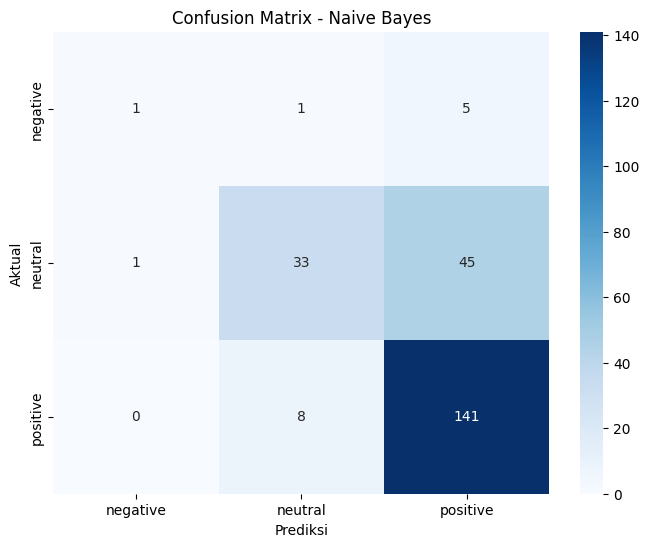

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_nb.classes_, yticklabels=grid_search_nb.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Inisialisasi model Naive Bayes sebagai weak learner untuk AdaBoost

In [ ]:
nb_model = MultinomialNB(alpha=0.1)  # Model Naive Bayes dasar
ada_boost_nb = AdaBoostClassifier(estimator=nb_model, n_estimators=50, learning_rate=1.0)

Latih AdaBoost dengan Naive Bayes

In [ ]:
ada_boost_nb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=MultinomialNB(alpha=0.1))

Prediksi pada data uji

In [ ]:
y_pred_boosted = ada_boost_nb.predict(X_test)

Evaluasi model

In [ ]:
print("=== Laporan Klasifikasi AdaBoost with Naive Bayes ===")
print(classification_report(y_test, y_pred_boosted))
print("Akurasi AdaBoost dengan Naive Bayes:", accuracy_score(y_test, y_pred_boosted))

=== Laporan Klasifikasi AdaBoost with Naive Bayes ===
              precision    recall  f1-score   support

    negative       0.50      0.14      0.22         7
     neutral       0.72      0.86      0.78        79
    positive       0.91      0.85      0.88       149

    accuracy                           0.83       235
   macro avg       0.71      0.62      0.63       235
weighted avg       0.83      0.83      0.83       235

Akurasi AdaBoost dengan Naive Bayes: 0.8297872340425532


Hitung confusion matrix untuk prediksi AdaBoost dengan Naive Bayes

In [ ]:
cm_boosted = confusion_matrix(y_test, y_pred_boosted)

Visualisasikan confusion matrix

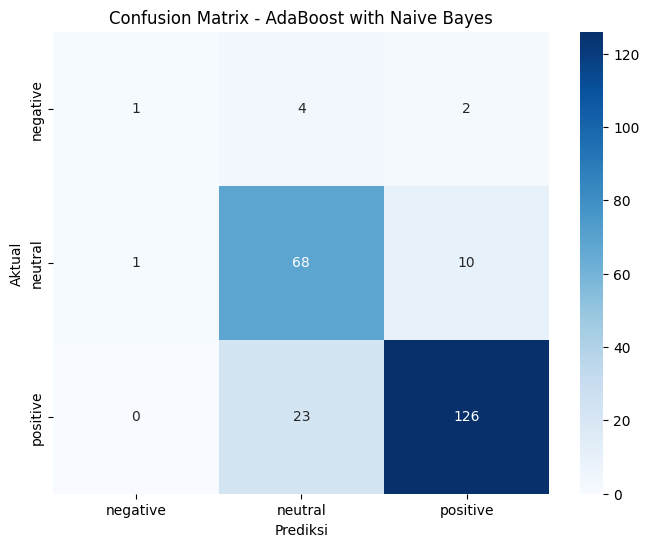

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_boosted, annot=True, fmt='d', cmap='Blues', xticklabels=ada_boost_nb.classes_, yticklabels=ada_boost_nb.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - AdaBoost with Naive Bayes')
plt.show()

Simpan hasil sentimen dari Naive Bayes ke dalam DataFrame

In [ ]:
df['sentiment_nb'] = grid_search_nb.best_estimator_.predict(X)

# **Visualisasi**

---



Prediksi sentimen untuk seluruh data menggunakan model AdaBoost yang sudah dilatih

In [ ]:
df['predicted_sentiment'] = ada_boost_nb.predict(X)

Hitung jumlah masing-masing kategori sentimen

In [ ]:
sentiment_counts = df['predicted_sentiment'].value_counts()

Bar chart untuk distribusi sentimen

<ipython-input-86-ff17a3f759b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


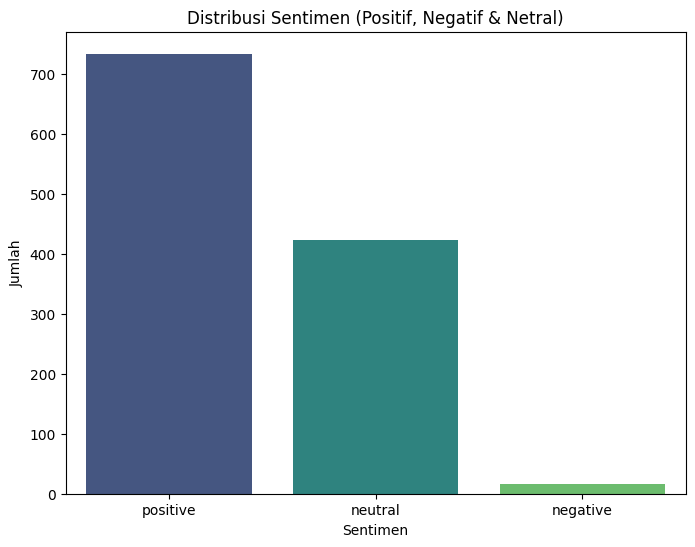

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen (Positif, Negatif & Netral)')
plt.show()

Pie chart untuk distribusi proporsi sentimen

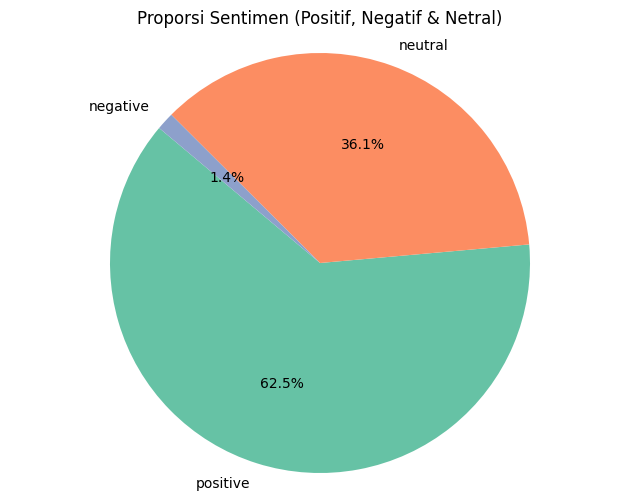

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.axis('equal')  # Agar pie chart menjadi bulat
plt.title('Proporsi Sentimen (Positif, Negatif & Netral)')
plt.show()

Filter teks berdasarkan sentimen yang diprediksi

In [ ]:
positif_text = ' '.join(df[df['predicted_sentiment'] == 'positive']['cleaned_content'])
negatif_text = ' '.join(df[df['predicted_sentiment'] == 'negative']['cleaned_content'])
netral_text = ' '.join(df[df['predicted_sentiment'] == 'neutral']['cleaned_content'])

Wordcloud untuk ulasan positif

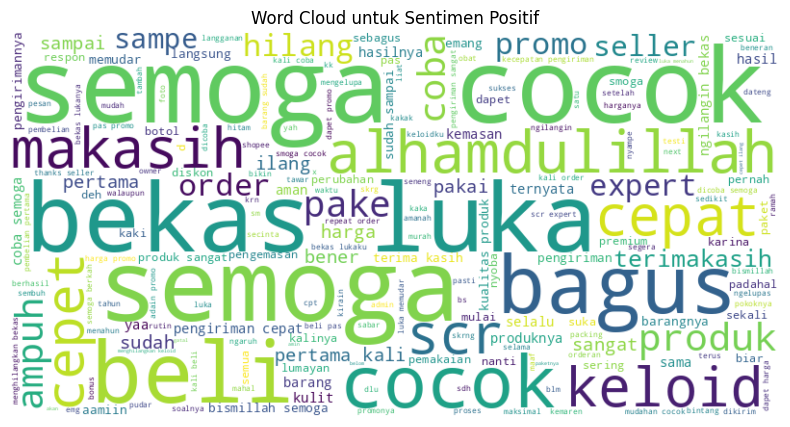

In [ ]:
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(positif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')
plt.show()

Wordcloud untuk ulasan negatif

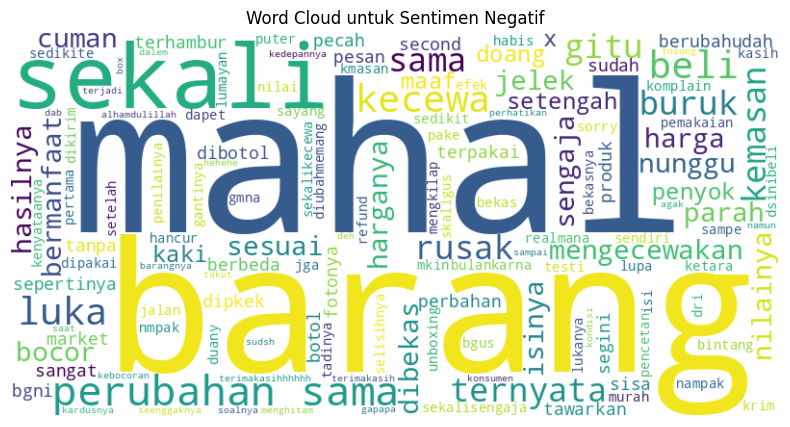

In [ ]:
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')
plt.show()

Prediksi sentimen untuk seluruh data menggunakan model AdaBoost yang sudah dilatih

In [ ]:
df['predicted_sentiment'] = ada_boost_nb.predict(X)


Simpan hasil ke dalam file CSV

In [ ]:
df.to_csv('hasil_prediksi_sentimen.csv', index=False)

print("Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen.csv'.")

Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen.csv'.
